<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Projects/NBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The National Basketball Association publish information about their end of season awards on their website (https://www.basketball-reference.com/awards/awards_2021.html)

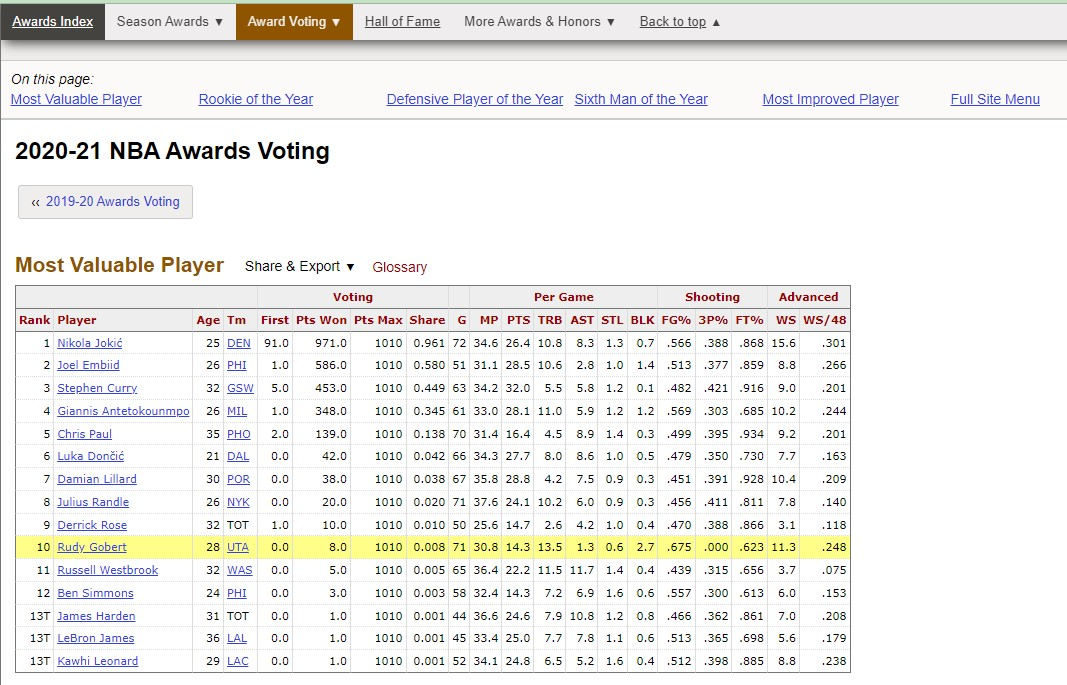

We might use these tables to help predict the Most Valued Player in the National Basketball Association league for 2022.  We would start this process by scraping the data from their website.  

## For reference:
---


This is the code used to scrape the tables from the website, using Colabs, and saving them in .csv files, downloaded to the local device.  They have been uploaded to Github so that you don't need to get them again.  The code below is included for reference.
```
import requests
from bs4 import BeautifulSoup
import pandas as pd
from google.colab import files

def get_data():
  years = list(range(1991, 2021))
  url = "https://www.basketball-reference.com/awards/awards_{}.html"
  for year in years:
    year_url = url.format(year)
    data = requests.get(year_url)
    soup = BeautifulSoup(data.text, "html.parser")
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find(id="mvp")
    mvp_year = pd.read_html(str(mvp_table))[0]
    filename = "mvp_{}.csv"
    mvp_year.to_csv(filename.format(year))
    files.download(filename.format(year))
  return mvp_year

table_data = get_data()
```





##Data sources:
---


The downloaded files were then uploaded to Github and are stored in this folder: https://github.com/futureCodersSE/python-programming-for-data/tree/main/Datasets/NBA-MVP.  Links to individual files are https://github.com/futureCodersSE/python-programming-for-data/blob/main/Datasets/NBA-MVP/mvp_1991.csv with the year replaced each time.

## Activity
---

Read the datasets (there are 11 dataset files - 1991 to 2021 - how can you use a loop to do this?)

Investigate the contents of the resulting dataframes.  

Can they be sensibly merged?  What do you observe?

Does sorting revealt any trends?

Is there a trend in performance (



Task 1: Using a for loop get data for each year from 1991 to 2021 and save them in one dictionary together. So I can access them when I need to merge them.

In [ ]:

import pandas as pd # we need pandas to work with dataframes

def get_dataframe(url):  # function to read csv files from url
  df  = pd.read_csv(url)
  return df

#Using a for loop read all the csv files and save the dataframes in one dictionary
url_str1 = "https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/NBA-MVP/mvp_"
df ={}
for i in range(1991,2022):
  url = url_str1+str(i)+".csv"
  # print(url)
  df[i] = get_dataframe(url)



All the dataframes from 1991 to 2021 are now saved in the dictionary df.

Task 2: Next I will take a look their columns and shapes and see if I can merge them in a sensible way.

In [ ]:
#Let's take a look at the dataframes to see what columns to merge with.

for i in range(1991,2022):
  print(df[i].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15 non-null     int64  
 1   Rank        15 non-null     object 
 2   Player      15 non-null     object 
 3   Age         15 non-null     int64  
 4   Tm          15 non-null     object 
 5   First       15 non-null     float64
 6   Pts Won     15 non-null     float64
 7   Pts Max     15 non-null     int64  
 8   Share       15 non-null     float64
 9   G           15 non-null     int64  
 10  MP          15 non-null     float64
 11  PTS         15 non-null     float64
 12  TRB         15 non-null     float64
 13  AST         15 non-null     float64
 14  STL         15 non-null     float64
 15  BLK         15 non-null     float64
 16  FG%         15 non-null     float64
 17  3P%         15 non-null     float64
 18  FT%         15 non-null     float64
 19  WS          15 non-null     flo

The columns in all the dataframes have the same headings and are the same in number. Only thing is it looks like some of them may have non-null values. But that will be dealt with when cleaning up the data. For now, let's look at how best to merge them.

In [ ]:
new_df = df[1991]
for i in range(1992,2022):
  df_add = df[i]
  new_df = pd.concat([new_df,df_add])

Let's see if the data are all merged and put together. The total number of rows should be 448, the first and last players' names are Jokić (from 1991 data) Leonard (from 2021 data) respectively.

In [ ]:
print(new_df.info())
print(new_df.head())
print(new_df.tail())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 14
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  448 non-null    int64  
 1   Rank        448 non-null    object 
 2   Player      448 non-null    object 
 3   Age         448 non-null    int64  
 4   Tm          448 non-null    object 
 5   First       448 non-null    float64
 6   Pts Won     448 non-null    float64
 7   Pts Max     448 non-null    int64  
 8   Share       448 non-null    float64
 9   G           448 non-null    int64  
 10  MP          448 non-null    float64
 11  PTS         448 non-null    float64
 12  TRB         448 non-null    float64
 13  AST         448 non-null    float64
 14  STL         448 non-null    float64
 15  BLK         448 non-null    float64
 16  FG%         448 non-null    float64
 17  3P%         439 non-null    float64
 18  FT%         448 non-null    float64
 19  WS          448 non-null    fl

The dataframes seem to be appended together well, but, I wonder if I can keep the years in some other way. So let's try merge instead. To do this, we will have to choose relavant columns that we want to keep for predicting the MVP. Keeping all columns will lead to overfitting data. Better to get information are what columns have more relavance/weight in predicting MVP based on further understanding. I am looking into it now and came up with something called Mutual Information scores. So let me understand that first and then get back here with relavant columns to merge.

Looks like defensive plays like blocking, stealing etc have less weightage than points scored, ranking,points scored, matches played etc. So we only need to consider upto first 11 columns. I think if we consider 10 years for 11 columns that is 110 columns...wonder if merging actually makes sense!

## Reference
---
**Video link**: https://www.youtube.com/watch?v=JGQGd-oa0l4 used as an initial inspiration and modified to allow use of Google Colab and slower progress towards predictions (video uses Jupyter notebooks and local files so code is different)

# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: